In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')
import os

os.getcwd()

print("All the required library has been Imported")

'C:\\Users\\NIlesh'

All the required library has been Imported


In [3]:
os.chdir('C:\\Users\\NIlesh\\HackLive\\HackLive Guided 2')
print("Directory has been changed to the desired directory")

Directory has been changed to the desired directory


In [4]:
print(f'Path: {os.getcwd()} ')
os.listdir()

Path: C:\Users\NIlesh\HackLive\HackLive Guided 2 


['catboost_info',
 'sample_submission.csv',
 'test.csv',
 'test_mPTIhGU',
 'test_mPTIhGU.zip',
 'train.csv',
 'train_dPrl03o',
 'train_dPrl03o.zip']

In [5]:
train = pd.read_csv("train.csv")
sample = pd.read_csv("sample_submission.csv")
test = pd.read_csv("test.csv")

print("This is how the Submission should look like   ⬇⬇⬇⬇⬇\n")
sample.head()

This is how the Submission should look like   ⬇⬇⬇⬇⬇



,video_id,likes
0,87185,0
1,9431,0
2,40599,0
3,494,0
4,73942,0


In [6]:
id_col, target_col = "video_id", "likes"

In [7]:
print(f"This is the shape of the Training Dataset:  {train.shape}")
print(f"This is the shape of the Testing Dataset:  {test.shape}")

This is the shape of the Training Dataset:  (26061, 12)
This is the shape of the Testing Dataset:  (11170, 11)


In [8]:
train.dtypes

video_id           int64
title             object
channel_title     object
category_id      float64
publish_date      object
tags              object
views            float64
dislikes         float64
comment_count    float64
description       object
country_code      object
likes            float64
dtype: object

In [9]:
train.info

<bound method DataFrame.info of        video_id                                              title  \
0         53364  Alif Allah Aur Insaan Episode 34 HUM TV Drama ...   
1         51040  It's Showtime Miss Q & A: Bela gets jealous of...   
2          1856  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n  ಕ್...   
3         22618       Havana - swing cover | dodie feat. FLASHBACK   
4         74074  MUMMY NE NI KEHTA - 2  FT. 102 NOT OUT| DUDE S...   
...         ...                                                ...   
26056     73469  BURTS BEES GOODNESS GLOWS FOUNDATION WEAR TEST...   
26057     45412  മമ്മൂട്ടിയെ കളിയാക്കിയ ഫെമിനിച്ചികളെ തേച്ചൊട്ട...   
26058     61555  Pyaas | SAJJAN SINGH RANGROOT | DILJIT DOSANJH...   
26059     45134            Eric will do whatever the narrator says   
26060      5968  Live with Dr.Shahid Masood | #ShahidKhaqanAbba...   

               channel_title  category_id publish_date  \
0                     HUM TV         24.0   2017-12-12   
1      ABS-

In [10]:
train.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')

In [11]:
"""

            Lets us now list the name of of columns which are  Non- Numerical
"""

cat_cols = [x for x in train.columns if x != id_col and train[x].dtypes == "object" ]

cat_cols

'\n\n            Lets us now list the name of of columns which are  Non- Numerical\n'

['title',
 'channel_title',
 'publish_date',
 'tags',
 'description',
 'country_code']

In [13]:
num_col = [x for x in train.columns if x not in cat_cols]

print(f'Numerical Columns are: {num_col}')

Numerical Columns are: ['video_id', 'category_id', 'views', 'dislikes', 'comment_count', 'likes']


In [14]:
print(f"Total Null values in the dataset is:{train.isnull().sum()}")

Total Null values in the dataset is:video_id         0
title            0
channel_title    0
category_id      0
publish_date     0
tags             0
views            0
dislikes         0
comment_count    0
description      0
country_code     0
likes            0
dtype: int64


# Univariate Analysis

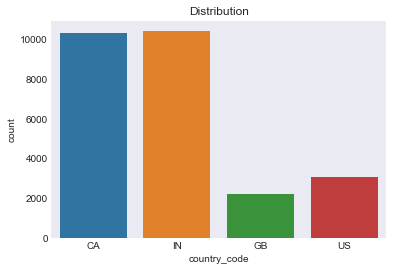

In [16]:
_ = sns.countplot(train.country_code)
_ = plt.title("Distribution")

In [17]:
print("Viewwers in India: "+str(sum(train.country_code == "IN")))
print("Viewwers in Canada: " +str(sum(train.country_code == "CA")))
print("Viewwers in GreatBritain: " +str(sum(train.country_code == "GB")))
print("Viewwers in USA: "+str(sum(train.country_code == "US")))

Viewwers in India: 10401
Viewwers in Canada: 10326
Viewwers in GreatBritain: 2239
Viewwers in USA: 3095


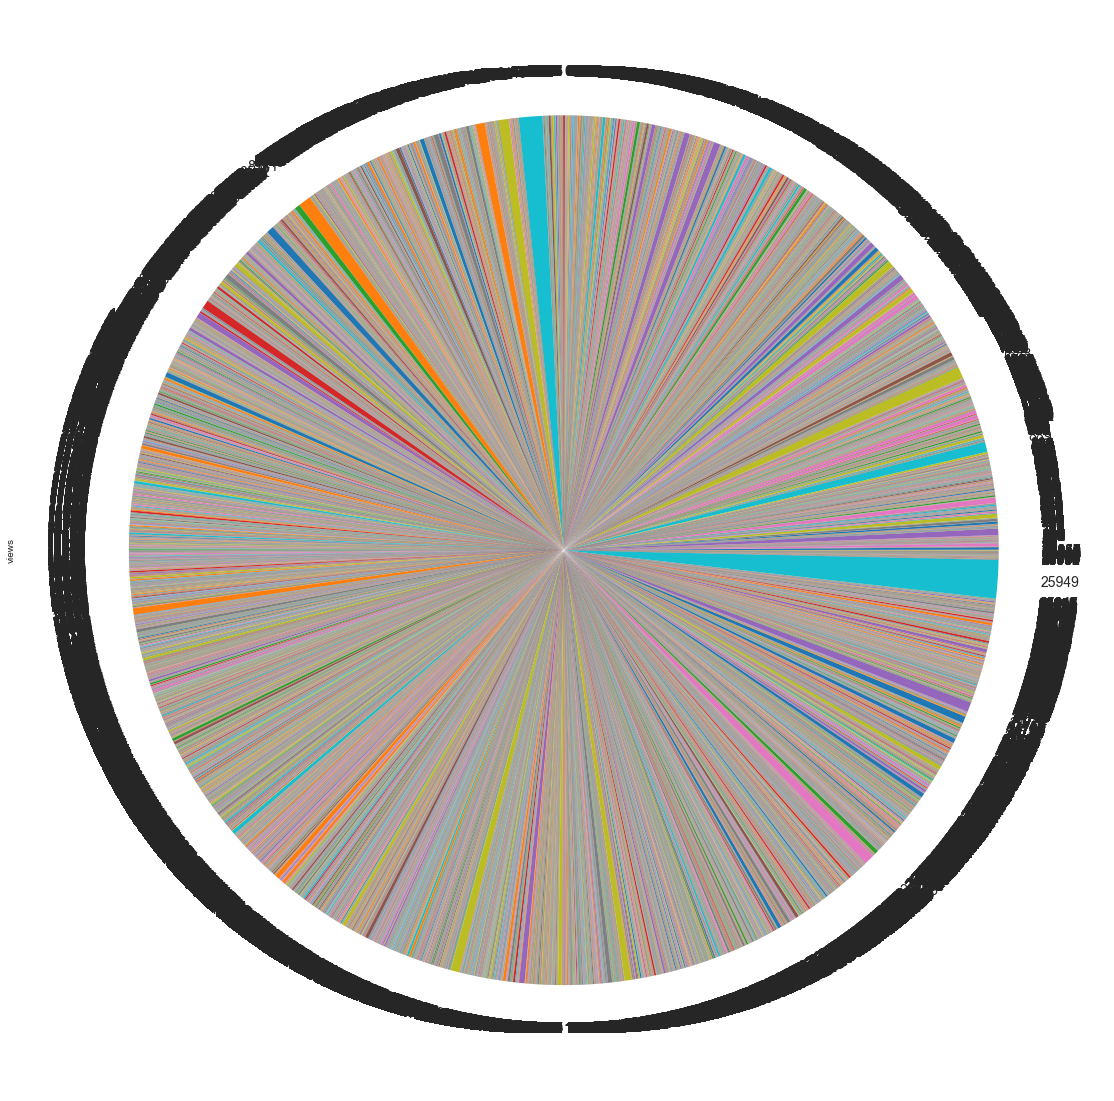

In [18]:
train.views.plot(figsize= (20,20),fontsize = 14,kind = "pie")

## I completely understand the above pie chart doesn't make sense.
## I was just curious to know how will it look

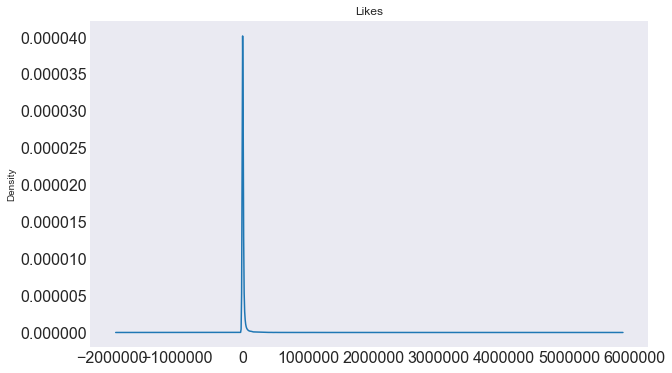

In [19]:
_ = train[target_col].plot(kind = "density", title = "Likes", figsize = (10,6), fontsize = 16)

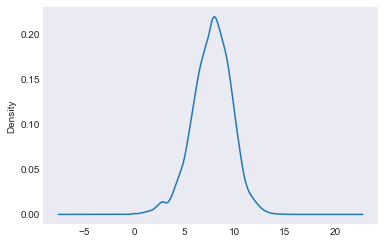

In [20]:
# loglp - Return the natural logarithm of one plus the input array, element-wise.

pd.Series(np.log1p(train.likes)).plot(kind = 'density')

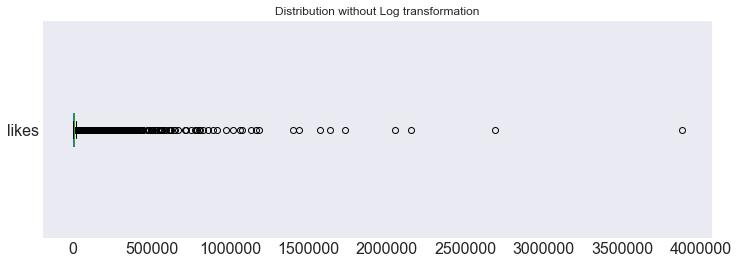

In [21]:
train.likes.plot(kind = "box",vert = False,figsize = (12,4),fontsize = 16, title="Distribution without Log transformation")

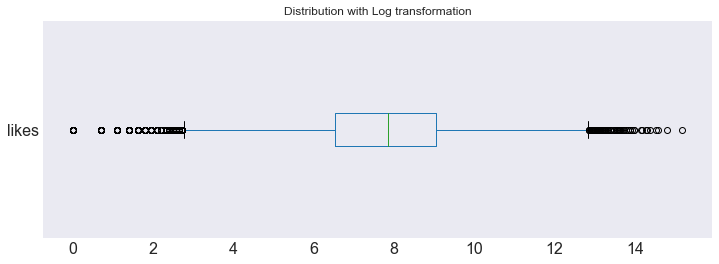

In [22]:
pd.Series(np.log1p(train.likes)).plot(kind = "box",vert = False,figsize = (12,4),fontsize = 16, title="Distribution with Log transformation")

In [23]:
# Let's look at the Null values

print(f'Total Null Value in the Dataset: {train.isnull().sum().sum()} \n')
train.isnull().sum()

Total Null Value in the Dataset: 0 



video_id         0
title            0
channel_title    0
category_id      0
publish_date     0
tags             0
views            0
dislikes         0
comment_count    0
description      0
country_code     0
likes            0
dtype: int64

In [24]:
# Let's look at the Uniques
print("Unique Values")
train.nunique()

Unique Values


video_id         26061
title            26005
channel_title     5764
category_id         17
publish_date       348
tags             21462
views            25338
dislikes          2633
comment_count     4993
description      23426
country_code         4
likes            12134
dtype: int64

['video_id', 'category_id', 'views', 'dislikes', 'comment_count', 'likes']


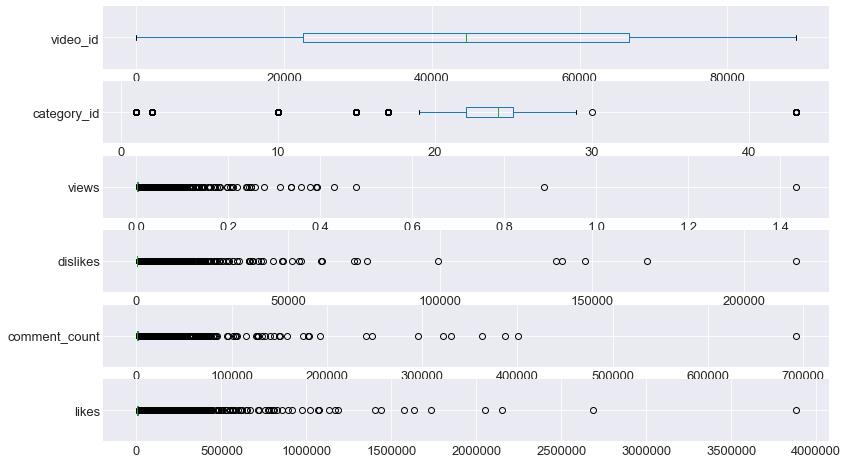

In [25]:
# Univariate Ananlysis
print(num_col)
fig, axes = plt.subplots(6, 1, figsize = (13,8))

for i,n in enumerate(num_col):
    _ = train[[n]].boxplot(ax = axes[i],vert = False,fontsize = 13)

# Bivariate Analysis:

<Figure size 1296x1080 with 0 Axes>

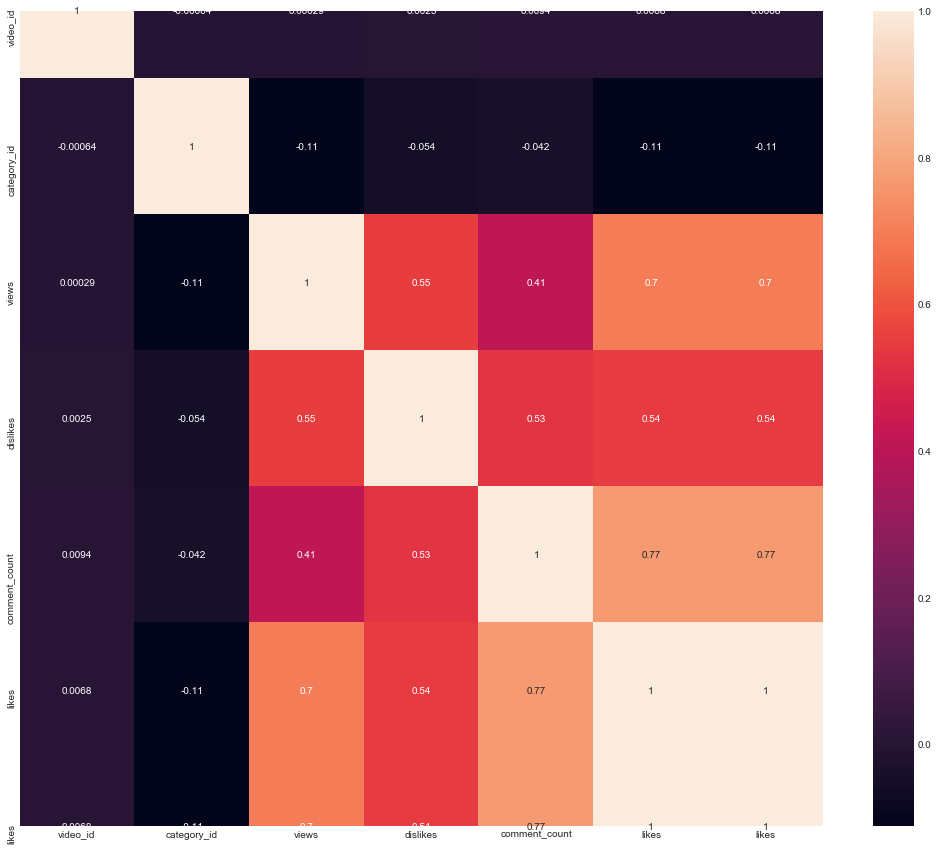

In [27]:
plt.figure(figsize = (18,15))
_ = sns.heatmap(train[num_col + ['likes']].corr(),annot = True)

<Figure size 1008x576 with 0 Axes>

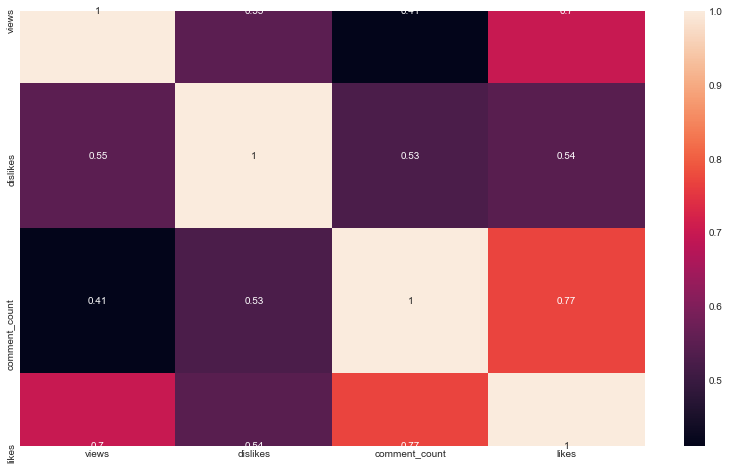

In [28]:

plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[['views', 'dislikes', 'comment_count'] + ['likes']].corr(), annot=True)

# Concatinate Train and Test Dataset:

In [29]:
df = pd.concat([train,test],axis = 0).reset_index(drop = True)
df.head()

,category_id,channel_title,comment_count,country_code,description,dislikes,likes,publish_date,tags,title,video_id,views
0,24.0,HUM TV,900.0,CA,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,298.0,2351.0,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,53364,351430.0
1,24.0,ABS-CBN Entertainment,314.0,CA,Vice Ganda notices Bela Padilla's sudden chang...,74.0,3264.0,2018-03-08,"ABS-CBN Entertainment|""ABS-CBN""|""ABS-CBN Onlin...",It's Showtime Miss Q & A: Bela gets jealous of...,51040,461508.0
2,24.0,SANDALWOOD REVIEWS,100.0,IN,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ ಕ್ಲ...,150.0,580.0,2018-03-26,"challenging star darshan latest news|""challeng...",ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n ಕ್...,1856,40205.0
3,10.0,doddleoddle,4536.0,GB,Hi hi hi! here's our vid on FLASHBACK's channe...,847.0,82773.0,2018-02-21,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",Havana - swing cover | dodie feat. FLASHBACK,22618,509726.0
4,23.0,Dude Seriously,161.0,IN,BOOK YOUR TICKETS HERE: https://goo.gl/QxdSyg...,69.0,3557.0,2018-05-10,"dude|""seriously""|""friends""|""fun""|""gujarati""|""h...",MUMMY NE NI KEHTA - 2 FT. 102 NOT OUT| DUDE S...,74074,74311.0


In [30]:
print(f'Shape of the Concatenated Dataframe is {df.shape}')

Shape of the Concatenated Dataframe is (37231, 12)


In [31]:
cat_cols

['title',
 'channel_title',
 'publish_date',
 'tags',
 'description',
 'country_code']

In [32]:
num_col = ['views','dislikes','comment_count']

df[num_col + ['likes']] = df[num_col + ['likes']].apply(lambda x: np.log1p(x))

df.likes

0         7.763021
1         8.091015
2         6.364751
3        11.323869
4         8.176954
           ...    
37226          NaN
37227          NaN
37228          NaN
37229          NaN
37230          NaN
Name: likes, Length: 37231, dtype: float64

In [33]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y-%m-%d')
df['publish_date_days_since_start'] = (df['publish_date'] - df['publish_date'].min()).dt.days
df['publish_date_day_of_week'] = df['publish_date'].dt.dayofweek
df['publish_date_year'] = df['publish_date'].dt.year
df['publish_date_month'] = df['publish_date'].dt.month

df['channel_title_num_videos'] = df['channel_title'].map(df['channel_title'].value_counts())
df['publish_date_num_videos'] = df['publish_date'].map(df['publish_date'].value_counts())
df['channel_in_n_countries'] = df.groupby('channel_title')['country_code'].transform('nunique')

df['channel_title_mean_views'] = df.groupby('channel_title')['views'].transform('mean')
df['channel_title_max_views'] = df.groupby('channel_title')['views'].transform('max')
df['channel_title_min_views'] = df.groupby('channel_title')['views'].transform('min')

df['channel_title_mean_comments'] = df.groupby('channel_title')['comment_count'].transform('mean')
df['channel_title_max_comments'] = df.groupby('channel_title')['comment_count'].transform('max')
df['channel_title_min_comments'] = df.groupby('channel_title')['comment_count'].transform('min')

In [34]:
def split_df_and_get_features(df, train_nrows):
    train,test = df[:train_nrows].reset_index(drop = True),df[train_nrows:].reset_index(drop = True)
    features = [c for c in train.columns if c not in [id_col,target_col]]
    
    return train,test,features

In [35]:
cat_cols = ['category_id', 'country_code', 'channel_title']
df[cat_cols] = df[cat_cols].apply(lambda x: pd.factorize(x)[0])

In [36]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])
features = [c for c in df.columns if c not in [id_col, target_col]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]

In [37]:
cat_num_cols

['category_id',
 'channel_title',
 'comment_count',
 'country_code',
 'dislikes',
 'views',
 'publish_date_days_since_start',
 'publish_date_day_of_week',
 'publish_date_year',
 'publish_date_month',
 'channel_title_num_videos',
 'publish_date_num_videos',
 'channel_in_n_countries',
 'channel_title_mean_views',
 'channel_title_max_views',
 'channel_title_min_views',
 'channel_title_mean_comments',
 'channel_title_max_comments',
 'channel_title_min_comments']

In [38]:
def av_metric(y_true, y_pred):
  return 1000 * np.sqrt(mean_squared_error(y_true, y_pred))

In [43]:
def run_gradient_boosting(clf,fit_params,train,test,features):
    N_SPLIT = 6
    oofs = np.zeros(len(train_proc))
    preds = np.zeros(len(test_proc))
    
    target = train[target_col]
    
    folds = StratifiedKFold(n_splits = N_SPLIT)
    stratified_target = pd.qcut(train[target_col], 10 , labels = False, duplicates = 'drop')
    
    feature_importances = pd.DataFrame()
    

    
    for fold_,(trn_idx,val_idx) in enumerate(folds.split(train,stratified_target)):
        print("\n ----------------------------------------------------------")
        print(f"                     Fold no. {fold_+1}               ")
        print("\n ----------------------------------------------------------")
        
        X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]
        
        X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]
        
        X_test = test[features]
        
        scaler = StandardScaler()
        _ = scaler.fit(X_trn)
        
        X_trn = scaler.transform(X_trn)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
        
        _ = clf.fit(X_trn,y_trn,eval_set = [(X_val, y_val)], **fit_params)
        
        fold_importance = pd.DataFrame({'fold':fold_+1,'feature':features,'importance':clf.feature_importances_})
        feature_importances = pd.concat([feature_importances, fold_importance], axis = 0)
        
        pred_val = clf.predict(X_val)
        preds_test = clf.predict(X_test)
        
        fold_score = av_metric(y_val,pred_val)
        print(f'\n AV metric score for validation set:  {fold_score}')
        
        oofs[val_idx] = pred_val
        preds+=preds_test/N_SPLIT
        
    oofs_score = av_metric(target,oofs)
    print(f"\n\n AV metric for oofs is: {oofs_score} ")
    
    feature_importances = feature_importances.reset_index(drop = True)
    fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending = False)[:20][::-1]
    fi.plot(kind = 'bar',figsize = (12,6))
    
    return oofs, preds, fi

In [41]:
df.dtypes

category_id                               int64
channel_title                             int64
comment_count                           float64
country_code                              int64
description                              object
dislikes                                float64
likes                                   float64
publish_date                     datetime64[ns]
tags                                     object
title                                    object
video_id                                  int64
views                                   float64
publish_date_days_since_start             int64
publish_date_day_of_week                  int64
publish_date_year                         int64
publish_date_month                        int64
channel_title_num_videos                  int64
publish_date_num_videos                   int64
channel_in_n_countries                    int64
channel_title_mean_views                float64
channel_title_max_views                 

In [42]:
train_proc
test_proc

,category_id,channel_title,comment_count,country_code,description,dislikes,likes,publish_date,tags,title,...,publish_date_month,channel_title_num_videos,publish_date_num_videos,channel_in_n_countries,channel_title_mean_views,channel_title_max_views,channel_title_min_views,channel_title_mean_comments,channel_title_max_comments,channel_title_min_comments
0,0,0,6.803505,0,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,5.700444,7.763021,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,...,12,94,220,2,12.621135,13.660803,11.460505,6.271691,8.293550,4.477337
1,0,1,5.752573,0,Vice Ganda notices Bela Padilla's sudden chang...,4.317488,8.091015,2018-03-08,"ABS-CBN Entertainment|""ABS-CBN""|""ABS-CBN Onlin...",It's Showtime Miss Q & A: Bela gets jealous of...,...,3,90,192,1,12.454794,14.849588,11.018301,4.973893,8.666303,1.945910
2,0,2,4.615121,1,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ ಕ್ಲ...,5.017280,6.364751,2018-03-26,"challenging star darshan latest news|""challeng...",ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n ಕ್...,...,3,15,185,1,10.810919,11.603086,9.623046,3.548825,5.683580,2.302585
3,1,3,8.420021,2,Hi hi hi! here's our vid on FLASHBACK's channe...,6.742881,11.323869,2018-02-21,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",Havana - swing cover | dodie feat. FLASHBACK,...,2,2,199,1,12.755342,13.141631,12.369054,8.251521,8.420021,8.083020
4,2,4,5.087596,1,BOOK YOUR TICKETS HERE: https://goo.gl/QxdSyg...,4.248495,8.176954,2018-05-10,"dude|""seriously""|""friends""|""fun""|""gujarati""|""h...",MUMMY NE NI KEHTA - 2 FT. 102 NOT OUT| DUDE S...,...,5,27,148,1,11.156955,11.692451,10.678698,5.670808,6.981006,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26056,6,256,6.753438,3,Don't forget to subscribe here-- http://bit.ly...,4.488636,8.889722,2018-01-16,"burts bees|""wear test""|""drugstore makeup""|""aff...",BURTS BEES GOODNESS GLOWS FOUNDATION WEAR TEST...,...,1,11,233,2,11.818482,12.570862,11.129261,6.650673,7.226209,6.100319
26057,0,249,5.393628,1,മമ്മൂട്ടിയെ കളിയാക്കിയ ഫെമിനിച്ചികളെ തേച്ചൊട്ട...,3.988984,7.292337,2017-12-17,"film news|""movie news""|""movie gossips""|""mollyw...",മമ്മൂട്ടിയെ കളിയാക്കിയ ഫെമിനിച്ചികളെ തേച്ചൊട്ട...,...,12,56,141,1,11.198416,12.884256,10.009693,3.735879,5.598422,1.791759
26058,1,629,7.671827,1,VIVID ART HOUSE PRESENTS\n“SAJJAN SINGH RANGRO...,7.400621,10.603685,2018-03-04,"punjabi songs|""punjabi bhangra""|""punjabi music...",Pyaas | SAJJAN SINGH RANGROOT | DILJIT DOSANJH...,...,3,57,127,2,13.706338,15.559303,10.318804,7.302194,10.216655,4.564348
26059,0,922,6.401917,0,Giant stuffed bag of cute plush cheese snacks....,4.521789,8.354204,2018-05-17,"vat19|""vat19 cheesy puffs""|""vat19 cheese balls...",Eric will do whatever the narrator says,...,5,51,179,2,12.352033,14.616593,11.334911,6.822611,8.317766,5.902633


,category_id,channel_title,comment_count,country_code,description,dislikes,likes,publish_date,tags,title,...,publish_date_month,channel_title_num_videos,publish_date_num_videos,channel_in_n_countries,channel_title_mean_views,channel_title_max_views,channel_title_min_views,channel_title_mean_comments,channel_title_max_comments,channel_title_min_comments
0,5,3323,4.382027,1,8885569579...CHIRRAVURI FOUNDATION.\n\n☛Subsct...,4.007333,NaN,2018-01-17,"Chirravuri|""Foundation""|""chirravuri foundation...",జనవరి 31 గ్రహణం రోజు కొడుకులు ఉన్నవాళ్లు ఏం చే...,...,1,9,213,1,10.548605,11.299658,9.960340,4.028734,6.030685,1.609438
1,5,718,5.743003,1,Don't Forget to SUBSCIRBE to our YouTube Chann...,5.442418,NaN,2017-11-18,"Raj Thackeray|""LIVE SPEECH""|""latest Speech""|""r...",ठाणे:'जेव्हा सत्ता बदलेल तेव्हा केस तुमच्यावरह...,...,11,14,179,1,12.617470,14.136830,11.448184,5.599020,7.356280,2.197225
2,7,5764,2.079442,0,"“To the devoted, the impassioned, the loyal:\n...",2.397895,NaN,2017-12-01,"Roughriders|""Riders""|""CFL""|""Regina""|""Saskatche...","Thank you, Rider Nation!",...,12,1,226,1,8.788593,8.788593,8.788593,2.079442,2.079442,2.079442
3,6,4590,5.783825,3,Using a spectrum analyzer app to analyze the s...,4.983607,NaN,2018-02-06,"rpm|""woodworking""|""tool speed""|""blade speed""|""...",Measuring RPM with a spectrum analyzer mobile app,...,2,3,199,1,11.638148,11.783128,11.403836,6.164864,6.858565,5.783825
4,5,2116,5.036953,1,Welcome to AVA Creative thoughts Channel Subsc...,5.880533,NaN,2018-02-06,"anasuya responded|""anasuya issue""|""anasuya bor...",Anchor Anasuya responded on Phone breaking iss...,...,2,4,199,1,11.046709,11.370117,10.650412,4.038541,5.036953,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11165,0,116,4.820282,1,Click here to Subscribe to SAB TV Channel : ht...,5.638355,NaN,2018-03-30,"tapu sena special|""tapu special clips""|""taarak...",Tapu Sena's Summer Vacation | Tapu Sena Specia...,...,3,233,191,2,11.902256,13.965944,10.557764,4.592909,6.111467,2.302585
11166,3,492,6.761573,0,ድርሰት: ተመስገን አፈወርቅ\nአዘጋጆች: ቴዎድሮስ ለገሰ ብዙ እና ተመስገ...,4.762174,NaN,2018-04-28,"Senselet|""Senselet part 43""|""senselet 43""|""Zem...",Senselet Drama S02 EP43 ሰንሰለት ምዕራፍ 2 ክፍል 43,...,4,12,126,1,11.793637,12.239517,11.561115,6.792493,7.208600,6.313548
11167,0,1662,7.339538,1,Don't put her on a pedestal. Don't shame her f...,5.017280,NaN,2018-03-08,"girl formula|""short film""|""telugu""|""telugu fun...",Being Woman | Girl Formula | Chai Bisket,...,3,25,192,1,11.891030,12.853459,10.978882,6.312285,7.989221,5.351858
11168,12,50,6.981006,1,Deivamagal Episode 1455\nSubscribe: https://go...,8.074960,NaN,2018-02-05,"deivamagal|""deiva magal""|""deiva magal serial""|...","Deivamagal Episode 1455, 05/02/18",...,2,54,177,2,13.438126,14.504709,12.441809,6.328357,8.198914,5.209486


# Lets us now tune the model and run the model 


 ----------------------------------------------------------
                     Fold no. 1               

 ----------------------------------------------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.554134
[600]	valid_0's rmse: 0.526292
[900]	valid_0's rmse: 0.514039
[1200]	valid_0's rmse: 0.508039
[1500]	valid_0's rmse: 0.504082
[1800]	valid_0's rmse: 0.500327
[2100]	valid_0's rmse: 0.497379
[2400]	valid_0's rmse: 0.496825
[2700]	valid_0's rmse: 0.495787
[3000]	valid_0's rmse: 0.495223
[3300]	valid_0's rmse: 0.494436
[3600]	valid_0's rmse: 0.49424
[3900]	valid_0's rmse: 0.494229
Early stopping, best iteration is:
[3737]	valid_0's rmse: 0.494046

 AV metric score for validation set:  494.0461416663379

 ----------------------------------------------------------
                     Fold no. 2               

 ----------------------------------------------------------
Training until validation scores don't improve for 200 rounds
[3

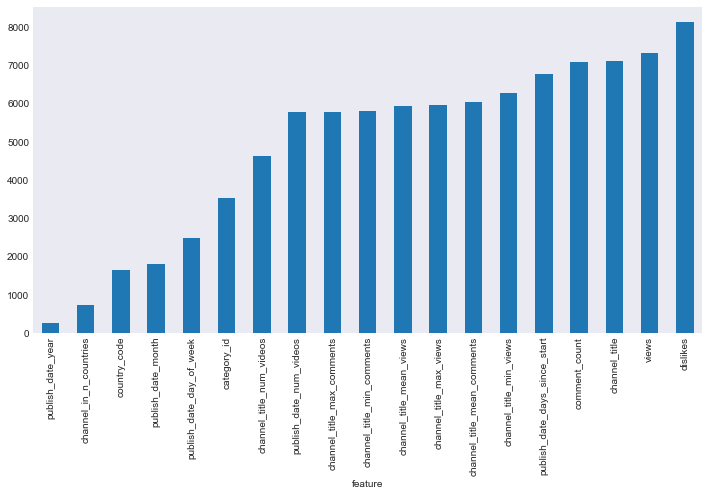

In [44]:
clf = LGBMRegressor(n_estimators = 5000,
                   learning_rate = 0.05,
                   colsample_bytree = 0.65,
                   metric = 'None')

fit_params = {'verbose':300,'early_stopping_rounds':200, 'eval_metric':'rmse'}
lgb_oofs, lgb_pred, fi = run_gradient_boosting(clf,fit_params,train_proc,test_proc,cat_num_cols)

# Create .csv file for Submission

In [45]:
submission = pd.DataFrame({'video_id': test[id_col],target_col: np.expm1(lgb_pred)})
submission.head()

,video_id,likes
0,87185,727.279619
1,9431,2092.333694
2,40599,23.907517
3,494,4208.854141
4,73942,534.846190


In [46]:
submission.to_csv("HackLive 2 Submission.csv", index = False)

In [47]:
os.listdir()

['catboost_info',
 'HackLive 2 Submission.csv',
 'sample_submission.csv',
 'test.csv',
 'test_mPTIhGU',
 'test_mPTIhGU.zip',
 'train.csv',
 'train_dPrl03o',
 'train_dPrl03o.zip']